# Решающие деревья

In [ ]:
import pandas as pd


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

## Логистическая регрессия. Из предыдущего урока

Теория по этому блоку в презентации

In [ ]:
df = pd.read_csv('telecom_churn.csv')

In [ ]:
var_cat = ['State', 'Area code', 'International plan', 'Voice mail plan']

var_real = ['Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total day charge', 'Total eve minutes',
            'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes',
            'Total intl calls', 'Total intl charge', 
            'Customer service calls', 'Account length']


df[var_cat] = df[var_cat].astype('object')
df = pd.get_dummies(df, drop_first=True)


X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Churn'])

In [ ]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

In [ ]:
y_pred_proba = model_logreg.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))

## Одинокий дуб

In [ ]:
model_tree = DecisionTreeClassifier()


model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict_proba(X_test)


print(roc_auc_score(y_test, y_pred_tree[:, 1]))

#### Подбор параметров

- **criterion** {“gini”, “entropy”}, default=”gini” <br>
Критерий информативности для оценки качества разбиения.

- **splitter**: {“best”, “random”}, default=”best” <br>
Стратегия для разбиения в каждой вершине. 

- **max_depth**: default=0 <br>
Максимальная глубина дерева. 

- **min_samples_split**: int or float, default=2 <br>
Количество объектов в вершине, необходимое для разбиения.

- **min_samples_leaf**: int or float, default=1 <br>
Минимальное число объектов, которое должно находиться в листьях. 

- **max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None <br>
Количество признаков, которое изучается при поиске наилучшего разбиения
The number of features to consider when looking for the best split:

И другие

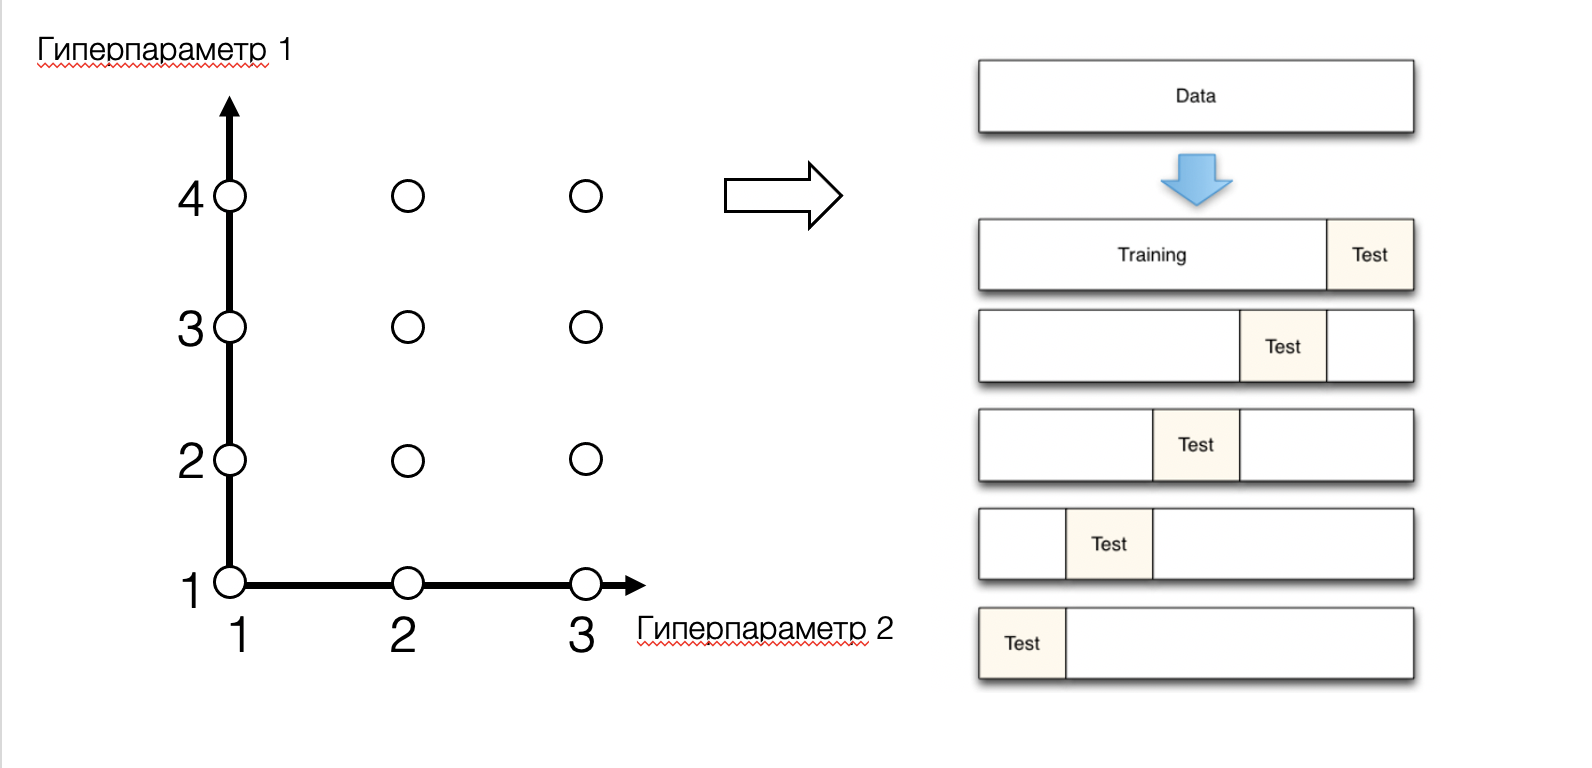

In [ ]:
model = DecisionTreeClassifier() 

param_grid = {'max_depth': [3, 5, 7, 10, 15], 'criterion': ['gini', 'entropy']}
grid_cv = GridSearchCV(model, param_grid, cv = 5, scoring='roc_auc')


grid_cv.fit(X_train, y_train)

In [ ]:
print('Лучшее значение параметра:', grid_cv.best_params_)
print('Лучшее качество:', grid_cv.best_score_)

In [ ]:
model_tree = grid_cv.best_estimator_
y_pred_tree_proba = model_tree.predict_proba(X_test)
roc_tree = roc_auc_score(y_test, y_pred_tree_proba[:, 1])
print(roc_tree)